## Computations for Miata 57 Models

#### The goal for these models and computations is to determine the theoretical amount of spheres needed to obtain a certain concentration of Miata57/cm^2

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Populate a Numpy array with input values
diameter = np.linspace(1, 200, 200)



THE NEXT TWO MODELS ARE INCORRECT AND ARE KEPT MERELY FOR REFERENCE



In [4]:
# BAD MODEL --- Math Model where the Z dimension is equal to the input radius
def comp_model_z_dep(r):
    percent = .25
    x = 1 # centiment
    y = 1 # centimeter
    r = r*1e-4
    rho_paint = 1.82 # grams per cubic centimeter
    pi = 3.14159265
    rho_copper_oxide = 6.31 # g per cubic centimeter
    
    no_beads = (percent*((x*y*r)*(rho_paint)))*(rho_copper_oxide*(4/3*pi*r**3))
    
    return(no_beads)

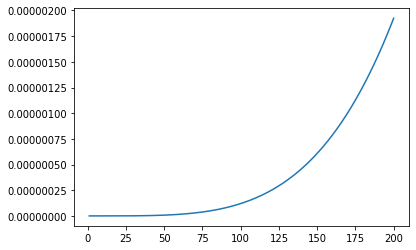

In [5]:
# MatPlotLib Plot Creation
plt.plot(diameter, comp_model_z_dep(diameter))

In [6]:
# BAD MODEL
# Math Model where the Z dimension is equal to the input radius
def comp_model_z_in(r):
    percent = .25
    x = 1 # centiment
    y = 1 # centimeter
    z = 1 # centimeter
    r = r*1e-4
    rho_paint = 1.82 # grams per cubic centimeter
    pi = 3.14159265
    rho_copper_oxide = 6.31 # g per cubic centimeter

    no_beads = (percent*((x*y*z)*(rho_paint)))*(rho_copper_oxide * (4/3 * pi * r ** 3))
    
    return(no_beads)

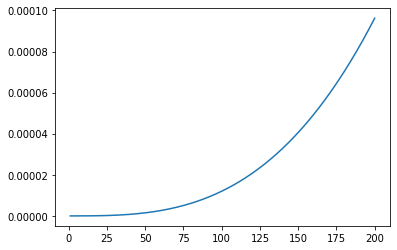

In [7]:
# MatPlotLib Plot Creation
plt.plot(diameter, comp_model_z_in(diameter))



THE NEXT TWO MODELS HAVE BEEN CORRECTED AND CALCULATE THE NUMBER OF SPHERES OF A GIVEN RADIUS 'r' THAT CAN BE MADE FROM THE COPPER IN ANY AREA OF PAINT



In [8]:
# Math Model where the Z dimension is equal to the input radius
# Z = r
def comp_model_fixed(r):
    percent = .25
    x = 1 # centiment
    y = 1 # centimeter
    r = r*1e-4 # micrometer to centimeter conversion
    rho_paint = 1.82 # grams per cubic centimeter
    pi = 3.14159265
    rho_copper_oxide = 6.31 # g per cubic centimeter

    no_beads = (percent*((x*y*r)*(rho_paint)))/(rho_copper_oxide*(4/3*pi*r**3))
    
    return(no_beads)

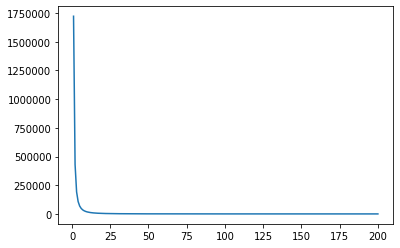

In [9]:
# Plotting Model
plt.plot(diameter, comp_model_fixed(diameter))

In [10]:
# Z ≠ r
def comp_model_fixed_z(r):
    percent = .25
    x = 1 # centimeter
    y = 1 # centimeter
    z = 1 # centimeter
    r = r*1e-4 # micrometer to centimeter conversion
    rho_paint = 1.82 # grams per cubic centimeter
    pi = 3.14159265
    rho_copper_oxide = 6.31 # g per cubic centimeter

    no_beads = (percent*((x*y*z)*(rho_paint)))/(rho_copper_oxide*(4/3*pi*r**3))
    
    return(no_beads)

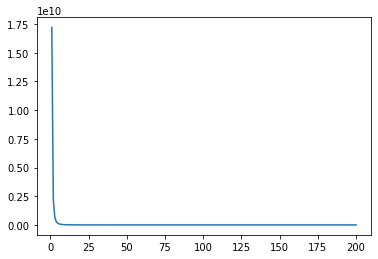

In [11]:
# Plotting Model
plt.plot(diameter, comp_model_fixed_z(diameter))


Next model is attempting to calculate the needed density of beads to get to an effective concentration of Miata57


In [15]:
# Function to Compute Model for getting the Concentration of Spheres of a given radius 'r'
# Units: 
# desired_miata_per_area = mg/cm^2
# r = µm
# percent_area_above_paint = unitless
# mitata_per_sphere_area = mg/cm^2
def get_cos(desired_miata_per_area, r, percent_area_above_paint, miata_per_sphere_area):
    pi = 3.14159265
    # radius input in micrometers needs conversion to centimeters
    r = r*1e-4
    
    # Computation
    cos = (desired_miata_per_area)/((percent_area_above_paint)*(miata_per_sphere_area)*(4*pi*r**2))
    
    return(cos)

In [20]:
# Generation of Input Data for Function get_cos() and get_nos()
# Numbers are intended as Sphere radii
radii = np.array([2, 5, 9, 12, 16, 20]) # micrometers

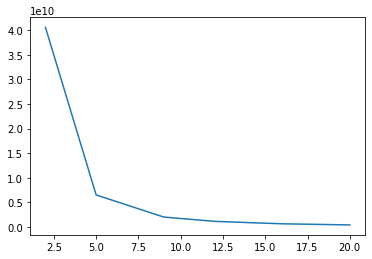

In [21]:
# Plotting Model that would show the necessary concentraion of spheres in spheres/cm^2 assuming some arbitrary 
# minute amount of exposed miata_per_sphere, say 0.05µg/cm2 at 49% exposure, to achieve the desired exposed miata
# concetration of 0.5 mg/cm^2 for a set of given radii
plt.plot(radii, get_cos(0.5, radii, .49, 5e-5))

In [22]:
# Function to Compute Model for getting the Number of Spheres over a given area to achieve a target value of exposed 
# Miata given the radius of the sphere assuming a target miata concentration in mg/cm^2, some arbitrary 
# minute amount of exposed miata_per_sphere in µg/cm2 at some percentage exposure, and some arbitrary 2D area 
# described as "l" cm and "w" cm
def get_nos(desired_miata_per_area, r, percent_area_above_paint, miata_per_sphere_area, l, w):
    pi = 3.14159265
    # radius input in micrometers needs conversion to centimeters
    r = r*1e-4
    
    # Computation
    nos = ((desired_miata_per_area)*(l*w))/((percent_area_above_paint)*(miata_per_sphere_area)*(4*pi*r**2))
    
    return(nos)

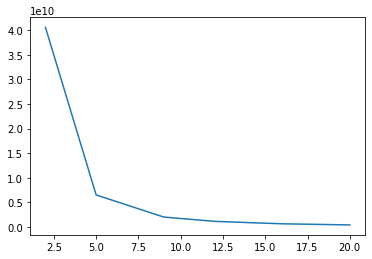

In [23]:
# Plotting Model that would show the necessary amount of spheres of a varied radius needed to achieve a given 
# concentration of Miata over a given area assuming a target miata concentration of 0.5 mg/cm^2, some arbitrary 
# minute amount of exposed miata_per_sphere, say 0.05µg/cm2 at 49% exposure, and some arbitrary 2D area of 1cm x 1cm
plt.plot(radii, get_nos(0.5, radii, .49, 5e-5, 1, 1))